# Bandara D.R.K.W.M.S.D
#### 190071B

### Question 1

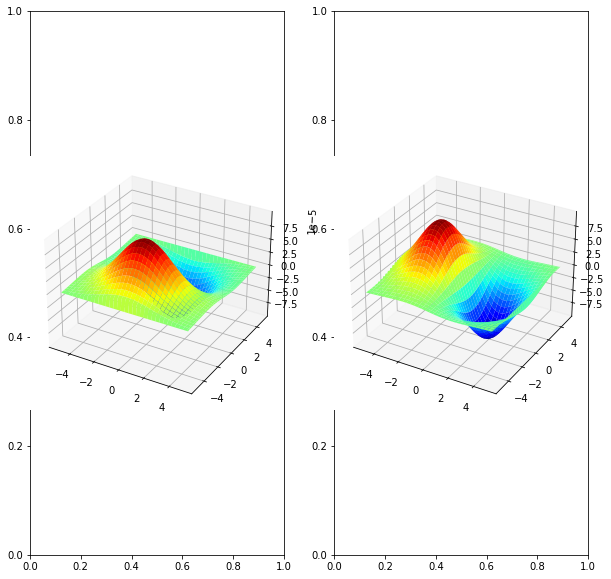

In [8]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig,ax = plt.subplots(1,2,figsize=(10,10))
ax1 = fig.add_subplot(121,projection = '3d')
ax2 = fig.add_subplot(122,projection = '3d')

img = cv.imread('building.tif')
imgConverted = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# fig, ax = plt.subplots(1,3, figsize = (10,10))
# ax[0].imshow(imgConverted)
# ax[0].set_title("Original")
delta = 0.1
xx,yy = np.meshgrid(np.arange(-5,5+ delta,delta),np.arange(-5,5+ delta,delta))

sigma = 2
g = np.exp(-(xx**2 + yy**2)/(2*sigma**2))
g/=np.sum(g)
Sobel_V = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype = np.float32)
Sobel_H = np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype = np.float32)
g_x = cv.filter2D(g,-1,Sobel_V)
g_y = cv.filter2D(g,-1,Sobel_H)


surf1 = ax1.plot_surface(xx,yy,g_x,cmap =cm.jet, linewidth = 0, antialiased = True)
surf2 = ax2.plot_surface(xx,yy,g_y,cmap =cm.jet, linewidth = 0, antialiased = True)

plt.show()

#### EX 2

Text(0.5, 1.0, 'Corners')

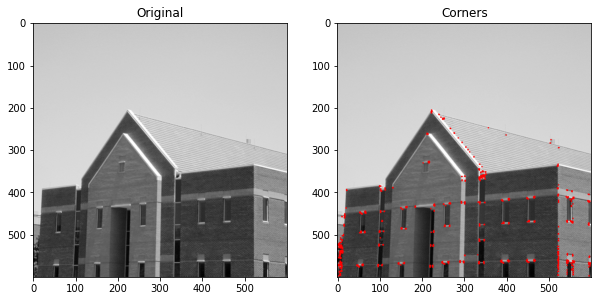

In [8]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('building.tif',cv.IMREAD_COLOR)
assert img is not None
imgConverted = cv.cvtColor(img, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,2, figsize = (10,10))
ax[0].imshow(imgConverted)
ax[0].set_title("Original")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
dst = cv.dilate(dst, None)
img[dst>0.01*dst.max()] = [0,0,255]
imgConverted2 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
ax[1].imshow(imgConverted2)
ax[1].set_title("Corners")

#### Ex3

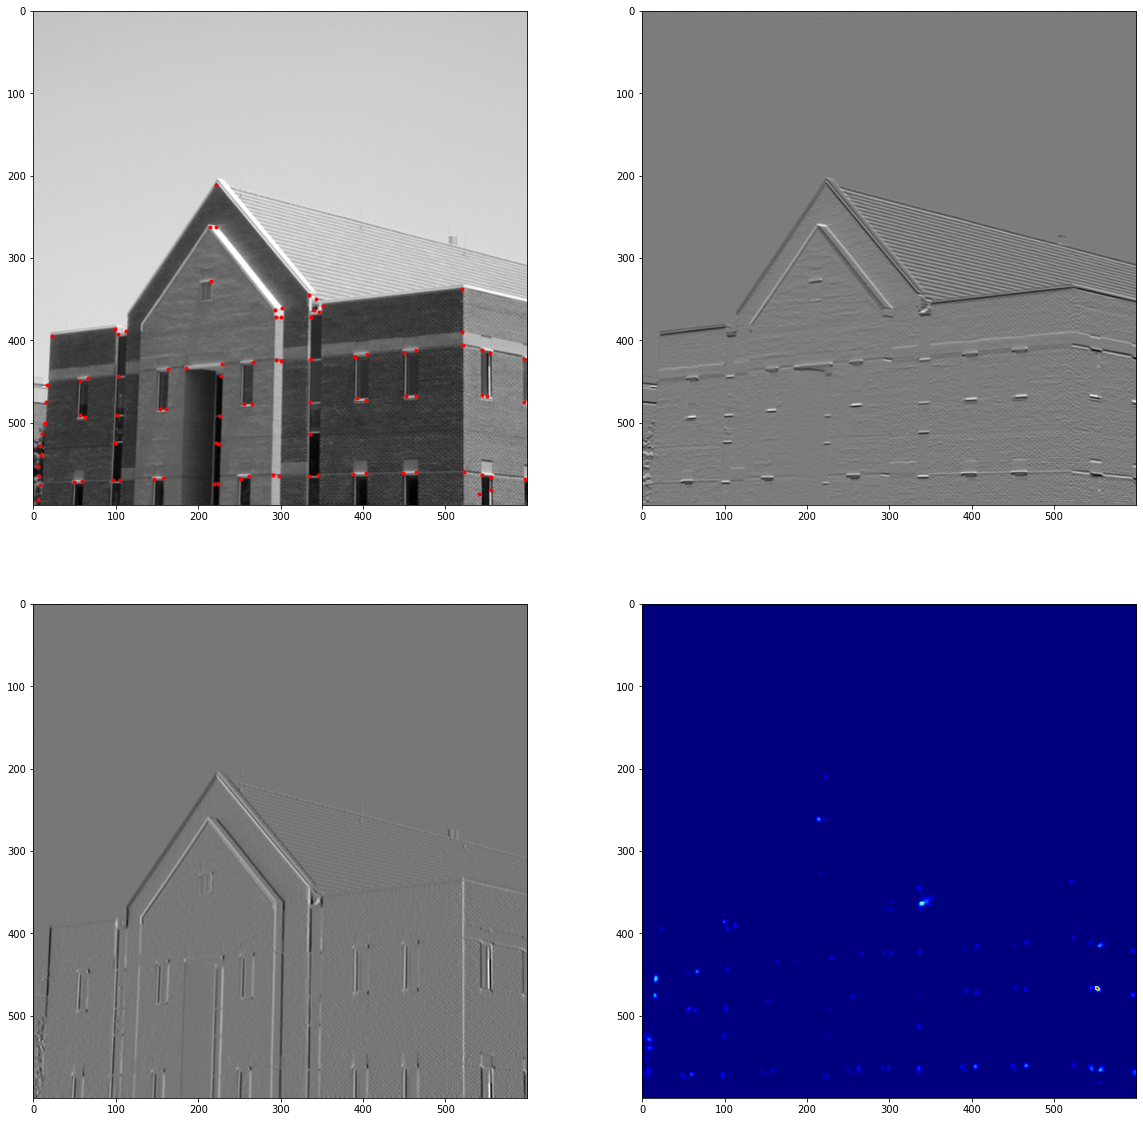

In [12]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from matplotlib import cm
img = cv.imread('building.tif',cv.IMREAD_COLOR)
assert img is not None

I = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
I = np.float32(I)
Sobel_V = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype = np.float32)
Sobel_H = np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype = np.float32)

Ix = cv.filter2D(I,-1,Sobel_V)
Iy = cv.filter2D(I,-1,Sobel_H) 
ksize = 7
sigma = 3
m11 = cv.GaussianBlur(Ix*Ix,(ksize,ksize),sigma)
m12 = cv.GaussianBlur(Ix*Iy,(ksize,ksize),sigma)
m21 = m12
m22 = cv.GaussianBlur(Iy*Iy,(ksize,ksize),sigma)
det = m11*m22-m12*m21
trace = m11+m22
alpha = 0.04
R = det - alpha*trace **2
R[R<1e8] = 0
coordinates = peak_local_max(R,min_distance = 2)
fig, ax = plt.subplots(2,2,figsize = (20,20))
ax[0,0].imshow(img,cmap = 'gray')
ax[0,0].plot(coordinates[:,1],coordinates[:,0],'r.')
ax[0,1].imshow(Ix+127,cmap = 'gray')
ax[1,0].imshow(Iy+127,cmap = 'gray')
ax[1,1].imshow(R+127,cmap = cm.jet)
plt.show()

#### EX4

Text(0.5, 1.0, 'Edges')

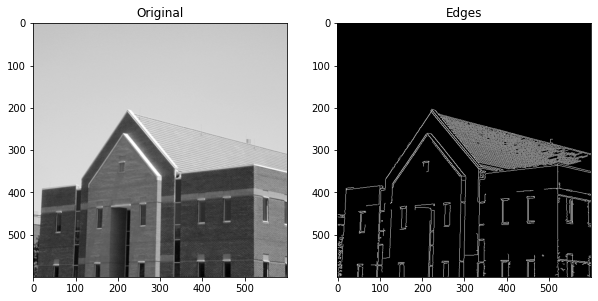

In [26]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('building.tif')
assert img is not None
imgConverted = cv.cvtColor(img, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,2, figsize = (10,10))
ax[0].imshow(imgConverted)
ax[0].set_title("Original")
edges = cv.Canny(img,100,200)#image low  Threshold highThreshold
imgConverted2 = cv.cvtColor(edges, cv.COLOR_BGR2RGB)

ax[1].imshow(imgConverted2)
ax[1].set_title("Edges")